In [62]:
from eose.targets import TargetPoint
from eose.geometry import Feature, FeatureCollection

import geopandas as gpd
from pydantic import ValidationError
from shapely.geometry import box, mapping

# example constructing an object model
p1 = TargetPoint(position=[0, 0, 0], id=1, crs="EPSG:4326")
display(p1.model_dump_json())  # display EOSE JSON
display(p1.as_feature().model_dump_json())  # display GeoJSON

# example transforming from a GeoJSON object
p2 = TargetPoint.from_feature(
    Feature.model_validate(
        {
            "type": "Feature",
            "geometry": {"type": "Point", "coordinates": [-45, 45, 0]},
            "properties": {"id": 2, "crs": "EPSG:4326"},
        }
    )
)
display(p2.model_dump_json())  # display EOSE JSON
display(p2.as_feature().model_dump_json())  # display GeoJSON

# example validation error
try:
    TargetPoint(position=[-181, 0, 0])
except ValidationError as err:
    display(err)

# example transformation to a GeoDataFrame
targets = gpd.GeoDataFrame.from_features(
    FeatureCollection(features=[p.as_feature() for p in [p1, p2]])
)
display(targets)  # display GeoDataFrame

'{"id":1,"crs":"EPSG:4326","position":[0.0,0.0,0.0]}'

'{"type":"Feature","geometry":{"type":"Point","coordinates":[0.0,0.0,0.0]},"properties":{"id":1,"crs":"EPSG:4326"}}'

'{"id":2,"crs":"EPSG:4326","position":[-45.0,45.0,0.0]}'

'{"type":"Feature","geometry":{"type":"Point","coordinates":[-45.0,45.0,0.0]},"properties":{"id":2,"crs":"EPSG:4326"}}'

2 validation errors for TargetPoint
position.tuple[constrained-float, constrained-float]
  Tuple should have at most 2 items after validation, not 3 [type=too_long, input_value=[-181, 0, 0], input_type=list]
    For further information visit https://errors.pydantic.dev/2.7/v/too_long
position.tuple[constrained-float, constrained-float, float].0
  Input should be greater than or equal to -180 [type=greater_than_equal, input_value=-181, input_type=int]
    For further information visit https://errors.pydantic.dev/2.7/v/greater_than_equal

,geometry,id,crs
0,POINT Z (0.00000 0.00000 0.00000),1,EPSG:4326
1,POINT Z (-45.00000 45.00000 0.00000),2,EPSG:4326


In [63]:
from eose.grids import UniformAngularGrid

# constructing an object model
g = UniformAngularGrid(
    delta_latitude=5, delta_longitude=5, region=mapping(box(-180, 0, 180, 90))
)
display(g.model_dump_json())  # display EOSE JSON
display(g.as_features().model_dump_json())  # display GeoJSON

# example transformation to a GeoDataFrame
grid = g.as_dataframe()
display(grid)  # display GeoDataFrame

'{"delta_longitude":5.0,"delta_latitude":5.0,"altitude":null,"region":{"type":"Polygon","coordinates":[[[180.0,0.0],[180.0,90.0],[-180.0,90.0],[-180.0,0.0],[180.0,0.0]]]},"crs":null}'

'{"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"Point","coordinates":[-177.5,2.5]},"properties":{"id":1296}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-172.5,2.5]},"properties":{"id":1297}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-167.5,2.5]},"properties":{"id":1298}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-162.5,2.5]},"properties":{"id":1299}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-157.5,2.5]},"properties":{"id":1300}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-152.5,2.5]},"properties":{"id":1301}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-147.5,2.5]},"properties":{"id":1302}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-142.5,2.5]},"properties":{"id":1303}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-137.5,2.5]},"properties":{"id":1304}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-132.5,2

,geometry,id
0,POINT (-177.50000 2.50000),1296
1,POINT (-172.50000 2.50000),1297
2,POINT (-167.50000 2.50000),1298
3,POINT (-162.50000 2.50000),1299
4,POINT (-157.50000 2.50000),1300
...,...,...
1291,POINT (157.50000 87.50000),2587
1292,POINT (162.50000 87.50000),2588
1293,POINT (167.50000 87.50000),2589
1294,POINT (172.50000 87.50000),2590


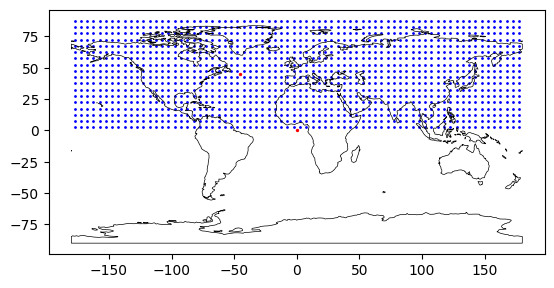

In [64]:
import matplotlib.pyplot as plt
import geopandas as gpd

# load shapefile
world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip"
)

# example composite plot using GeoDataFrames
fig, ax = plt.subplots()
grid.plot(ax=ax, markersize=1, color="b")
targets.plot(ax=ax, markersize=2, color="r")
world.boundary.plot(ax=ax, lw=0.5, color="k")
ax.set_aspect("equal")
plt.show()